## Nonlinear constrained convex optimization problem 3
$\newcommand{\n}[1]{\left\|#1 \right\|}$ 
$\renewcommand{\a}{\alpha}             $ 
$\renewcommand{\b}{\beta}              $ 
$\renewcommand{\c}{\gamma}             $ 
$\renewcommand{\d}{\delta}             $ 
$\newcommand{\D}{\Delta}               $ 
$\newcommand{\la}{\lambda}             $ 
$\renewcommand{\t}{\tau}               $ 
$\newcommand{\s}{\sigma}               $ 
$\newcommand{\e}{\varepsilon}          $ 
$\renewcommand{\th}{\theta}            $ 
$\newcommand{\x}{\bar x}               $ 
$\newcommand{\R}{\mathbb R}            $ 
$\newcommand{\N}{\mathbb N}            $ 
$\newcommand{\Z}{\mathbb Z}            $ 
$\newcommand{\E}{\mathcal E}           $ 
$\newcommand{\lr}[1]{\left\langle #1\right\rangle}$
$\newcommand{\nf}[1]{\nabla f(#1)}     $
$\newcommand{\hx}{\hat x}               $
$\newcommand{\hy}{\hat y}               $
$\DeclareMathOperator{\prox}{prox}      $
$\DeclareMathOperator{\argmin}{argmin}  $
$\DeclareMathOperator{\dom}{dom}        $
$\DeclareMathOperator{\id}{Id}          $
$\DeclareMathOperator{\conv}{conv}      $

We are interested in a constrained convex optimization problem
\begin{align*}
\min_{x} &\quad  f(x)\\
& h_i(x)  \leq 0, \quad i=1,\dots,m, \\
& x \in C,
\end{align*}

where $f, h_i \colon \R^d \to \R$ are smooth convex functions, $C\in \R^d$ is a convex set, which encodes simple constraints (projection on which are simple). 

Introducing Lagrange multipliers $y_i$ for each of constraints, we obtain
$$\min_{x\in C}\max_{y \in \R^m_+} f(x) + \sum_{i=1}^m y_i h_i(x)$$

Then $$F(x,y) = \binom{\nabla f(x) + \lr{y,\nabla h(x)}}{-h(x)},$$
where $h(x) = (h_1(x),\dots, h_m(x))$, and thus, $\nabla h(x) = (\nabla h_1(x),\dots, \nabla h_m(x))$


In [1]:
import matplotlib.pyplot as plt

from methods.algorithms_terminate import *
from misc.opt_operators import *

%load_ext autoreload
%matplotlib inline
%autoreload 2

In [12]:
d = 5000
m = 1

gen = 1
np.random.seed(gen)
c = np.random.uniform(0,10, d)
alpha = np.random.uniform(0,1, d)
beta = np.random.uniform(0,1, d)


f = lambda x: c.dot(x)
df = lambda x: c


h = lambda x: (alpha * np.exp(-beta * x)).sum() - d
dh = lambda x: -beta * alpha * np.exp(-beta * x)  

def F(z):
    x,y = z[:d], z[d:]
    x1 = df(x) + y*(dh(x))
    y1 = - h(x)
    return np.hstack([x1,y1])

def prox_g(z,eps):
    x,y = z[:d], z[d:]
    x1 = x
    #x1 = np.clip(x, -100,0)
    x1 = proj_ball(x,np.zeros(d),10)
    y1 = np.fmax(y,0)
    return np.hstack([x1,y1])
    
x0 = np.ones(d)*10
y0 = np.zeros(1)
z0 = np.hstack([x0,y0])

J = lambda z, rho: LA.norm(z - prox_g(z-rho*F(z),rho))


In [13]:
N = 50000
ans1 = tseng_fbf_linesearch(F, prox_g, z0, delta=1.5, numb_iter=N)
ans2 = alg_VI_proj(F, prox_g, z0, tau_0=1, constr=True, numb_iter=N)
ans3 = alg_VI_prox(F, prox_g, z0, numb_iter=N)

---- FBF alg.----
Number of iterations: 544
Number of prox_g: 1173
Number of F, : 1717
Time execution: 0.58
---- Alg. 1 ----
Number of iterations: 21
Number of prox_g: 21
Number of F, : 60
Time execution: 0.02
---- Alg. 2 ----
Number of iterations: 21
Number of prox_g: 21
Number of F, : 53
Time execution: 0.02


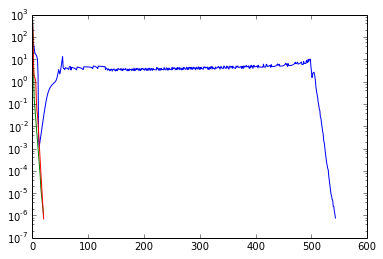

In [11]:
plt.plot(ans1[0],'b')
plt.plot(ans2[0],'g')
plt.plot(ans3[0],'r')

plt.yscale('log')
plt.show()